In [22]:
import glob
import os
import librosa
import numpy as np
import soundfile
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [5]:
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

### Affichage d'un graphique qui nous montre le l'audio

In [1]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

### Affichage d'un graphique qui nous montre le spectre de l'audio

In [16]:
def spec(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis="time", y_axis="hz")
    plt.colorbar()

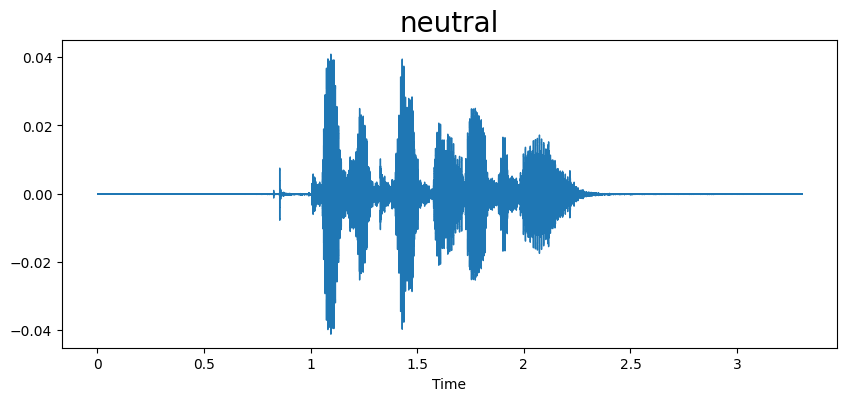

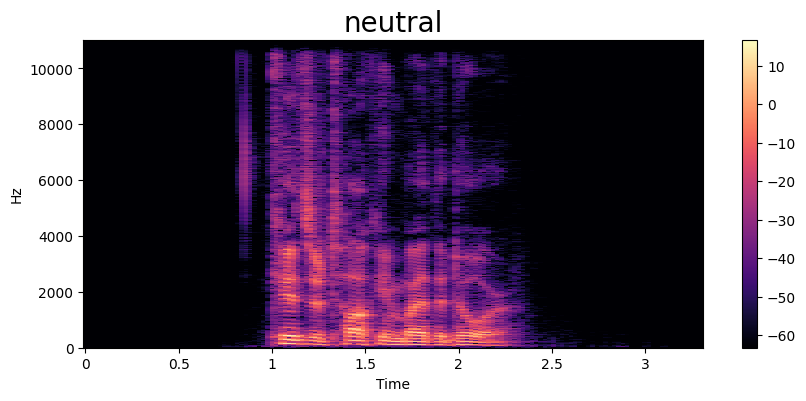

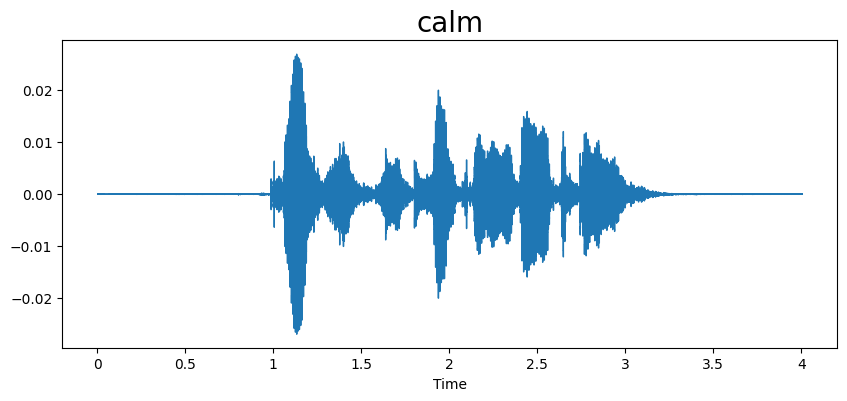

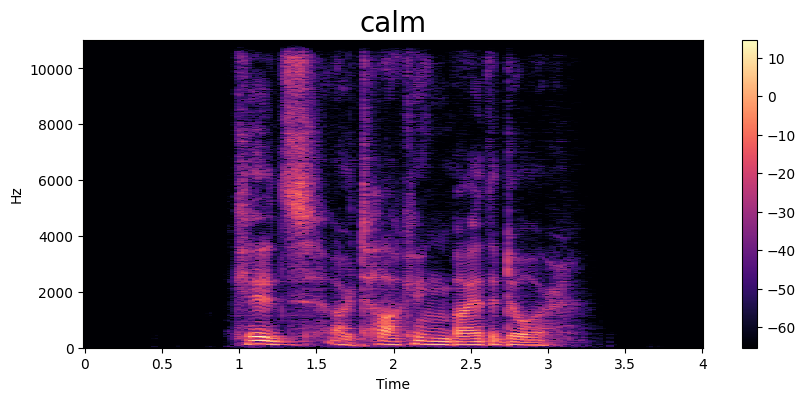

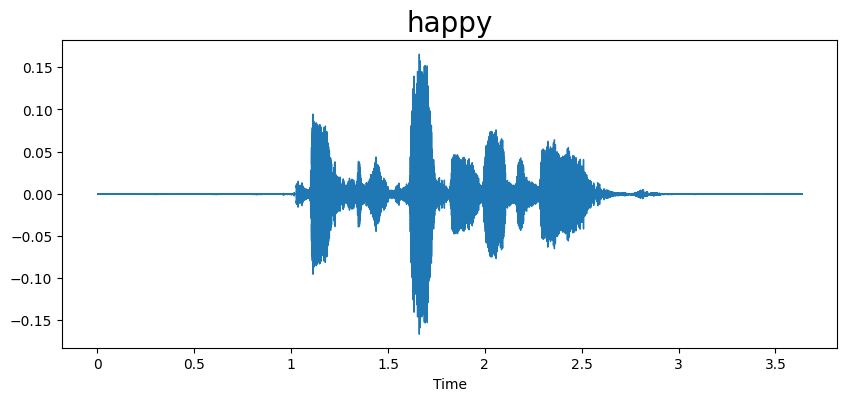

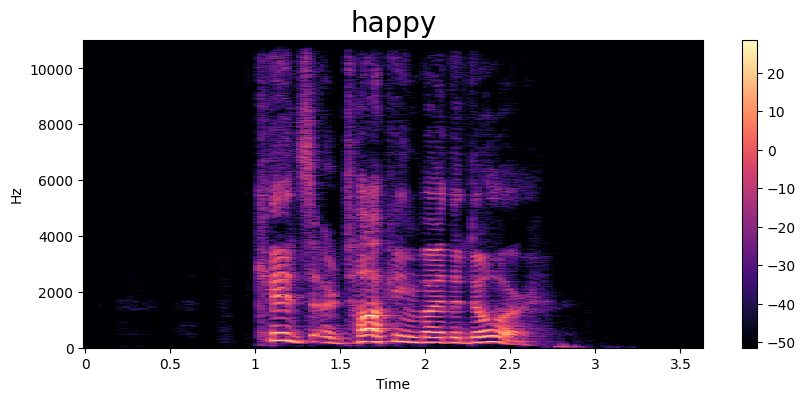

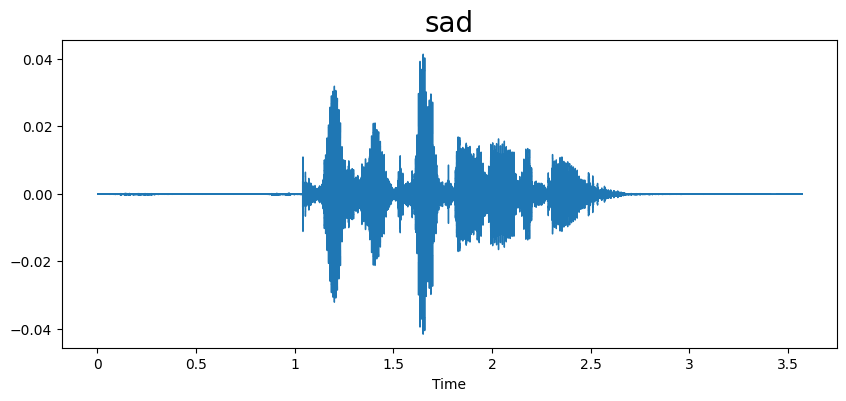

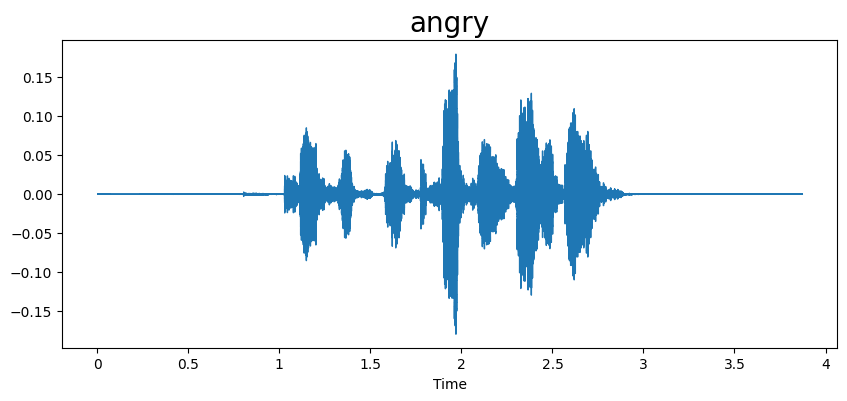

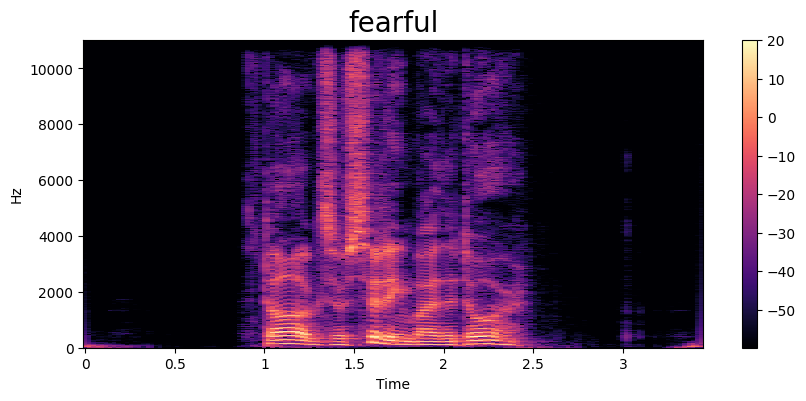

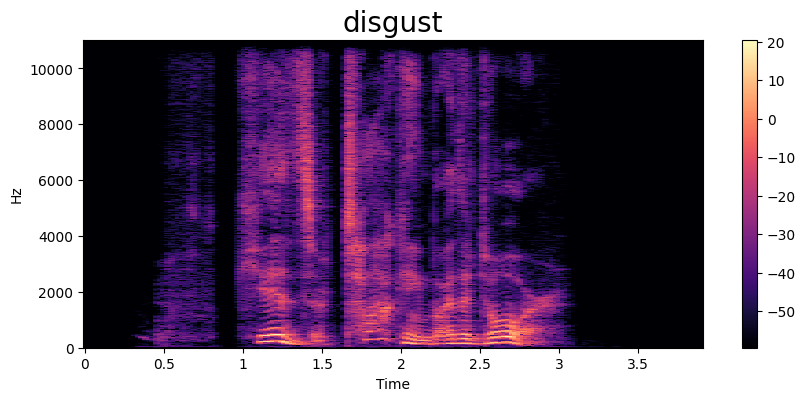

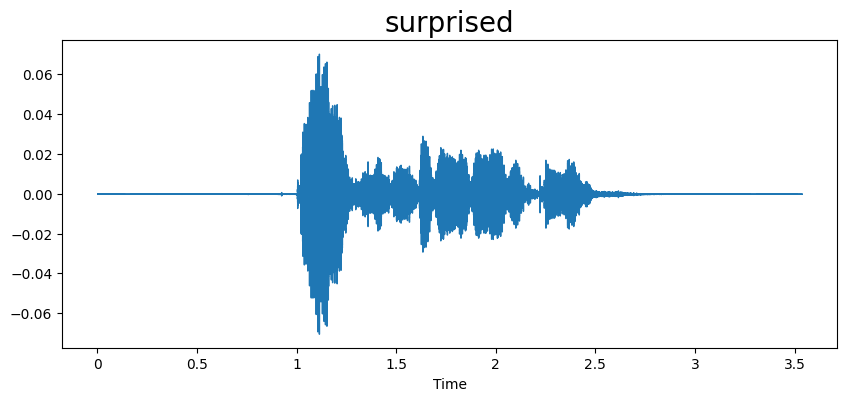

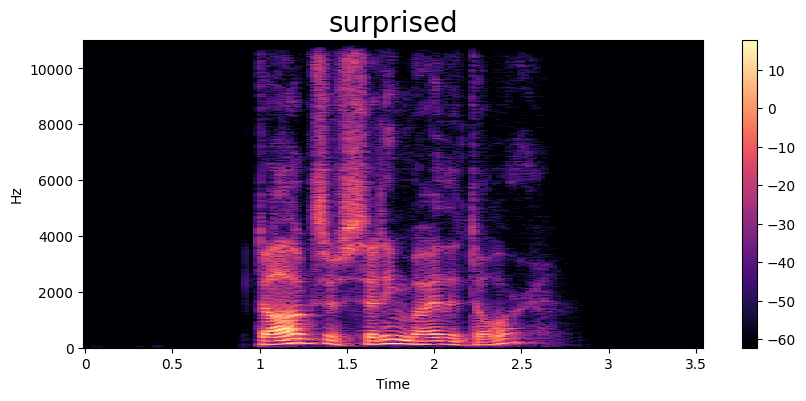

In [21]:
for file in glob.glob("./../../dataset/pres/*.wav"):

    # Nom du fichier
    file_name = os.path.basename(file)

    # On recupere l'émotion
    emotion = emotions[file_name.split("-")[2]]

    # Lecture de l'audio
    data, sr = librosa.load(file)

    # Affichage des graphiques
    waveplot(data, sr, emotion)
    spec(data, sr, emotion)

### Extraction des ressources

In [27]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [30]:
for file in glob.glob("./../../dataset/data/Actor_*/*.wav"):

    # Nom du fichier
    file_name = os.path.basename(file)

    # On recupere l'émotion
    emotion = emotions[file_name.split("-")[2]]

    # Extraction du mfcc
    print(extract_mfcc(file))

[-6.7019543e+02  6.5063850e+01  8.8895446e-01  1.4715978e+01
  9.1821651e+00  6.6057485e-01 -3.8468361e+00 -3.5839462e+00
 -1.2959006e+01 -3.3001330e+00  9.1077948e-01 -3.5970356e+00
  2.3762741e+00 -4.3889413e+00  5.4508018e-01  8.9185154e-01
 -4.8025899e+00 -2.1054139e+00 -1.6059692e+00 -1.0523905e+00
 -7.0672808e+00 -6.2306124e-01 -2.7280297e+00 -5.3073611e+00
 -1.9691168e+00 -9.4615304e-01 -5.7211108e+00  3.3299109e-01
 -2.5438454e+00  1.8220851e-01 -2.3510978e+00 -2.5047274e+00
 -3.1515071e+00 -2.1908991e+00 -3.8017602e+00 -1.8130873e+00
 -1.2612225e+00 -2.1449544e+00 -4.1521730e+00 -1.7796154e+00]
[-6.6023035e+02  6.3325817e+01 -2.6304572e+00  1.7983355e+01
  9.4077034e+00 -9.8149818e-01 -2.3246970e+00 -6.8480315e+00
 -1.4133670e+01 -2.2003322e+00  4.8575455e-01 -3.5897148e+00
  7.0367616e-01 -4.2963762e+00 -5.7926393e-01  1.6835241e-01
 -5.5569301e+00 -1.3754358e+00 -2.4312060e+00  3.9963502e-01
 -6.5191483e+00 -1.1592473e+00 -2.4237981e+00 -5.6531844e+00
 -8.7866449e-01 -2.0320